In [60]:
%load_ext autoreload
%autoreload 2
import sys
import torch
import pickle
import pandas as pd
from torch import nn
import numpy as np
# sys.path.append('..')
# sys.path.append('/system/user/beck/pwbeck/projects/regularization/ml_utilities')
from pathlib import Path
from omegaconf import OmegaConf
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from tueplots.constants.color import palettes

###
from ml_utilities.torch_models.fc import FC
from ml_utilities.output_loader.model_loader import get_best_model_idx
from ml_utilities.output_loader.job_output import SweepResult, JobResult
from ml_utilities.output_loader.plot import plot_sweep_summary, plot_data_log_values
from ml_utilities.plot import color_palettes, tol_colors
###
from erank.data.datasetgenerator import DatasetGenerator
from ml_utilities.data_utils import show_images

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
gpu_id = 0

# 11.7.2 MNIST Lenet rotatedtasks samples

In [3]:
# experiment config + output directory
output_dir = '/system/user/beck/pwbeck/projects/regularization/erank/outputs/mnist-11.7.2-lenet_rottasks_samples--221116_181955'
pretrain_dir = '/system/user/beck/pwbeck/projects/regularization/erank/outputs/mnist-11.5.0-lenet--221015_122552'

## A. Pretrain run

In [4]:
jobpr = JobResult(pretrain_dir)
jobpr.is_successful_job, jobpr.override_hpparams, jobpr.data_log_sources, jobpr.progress_measure, jobpr.best_model_idx

(True, {}, ['train_step', 'train', 'val'], 'step', 430)

In [5]:
jobpr.get_summary()

,best_step,best_val_score,seed
mnist-11.5.0-lenet--221015_122552,430,0.96075,0


In [6]:
prdf = jobpr.get_data_log('val')
prdf

,log_step,epoch,train_step,loss_CrossEntropyLoss,Accuracy,time_last_val_epoch_in_s
0,0,0,0,2.307779,0.100833,0.000000
1,11,1,10,1.112670,0.692917,4.400983
2,22,1,20,0.605911,0.820750,2.555349
3,33,1,30,0.487692,0.851917,2.494766
4,44,1,40,0.395618,0.881917,2.697411
5,55,1,50,0.363941,0.895417,3.087332
6,66,1,60,0.334547,0.903083,2.584583
7,77,1,70,0.320301,0.905750,2.600296
8,88,1,80,0.310124,0.907500,2.563866
9,99,1,90,0.295241,0.912167,2.876395


In [7]:
prdf = jobpr.get_data_log(['train_step', 'val'])
prdf

,log_step,epoch,train_step,train_step-loss_CrossEntropyLoss,train_step-Accuracy,train_step-weight_norm,val-loss_CrossEntropyLoss,val-Accuracy,val-time_last_val_epoch_in_s
490,0,0,0,NaN,NaN,NaN,2.307779,0.100833,0.000000
0,1,1,0,2.313010,0.101562,11.707621,NaN,NaN,NaN
1,2,1,1,2.201852,0.429688,11.726831,NaN,NaN,NaN
2,3,1,2,2.098251,0.468750,11.752336,NaN,NaN,NaN
3,4,1,3,1.988275,0.539062,11.783297,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
486,536,2,486,0.164481,0.945312,16.577518,NaN,NaN,NaN
487,537,2,487,0.137834,0.953125,16.582777,NaN,NaN,NaN
488,538,2,488,0.083491,0.976562,16.588509,NaN,NaN,NaN
489,539,2,489,0.075387,0.976562,16.595190,NaN,NaN,NaN


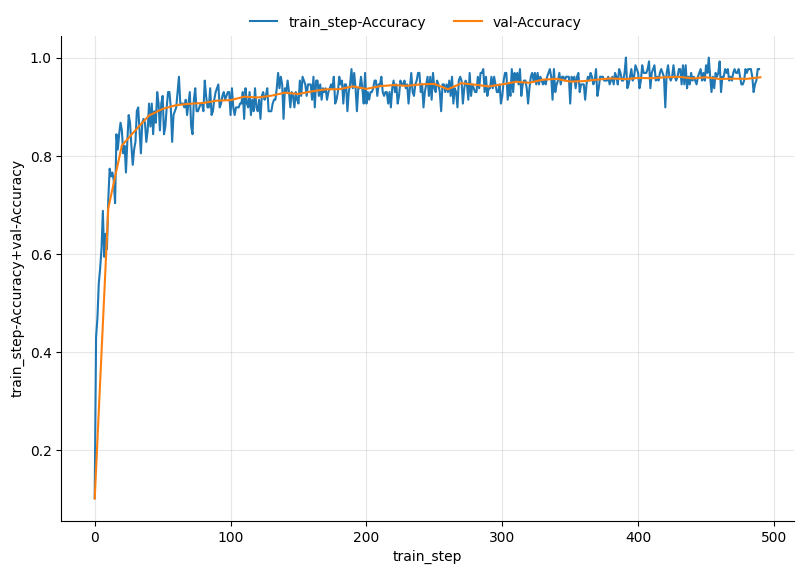

In [8]:
# plot learning curve
f = plot_data_log_values(prdf, x_axis='train_step', y_axis_left=['train_step-Accuracy', 'val-Accuracy'])

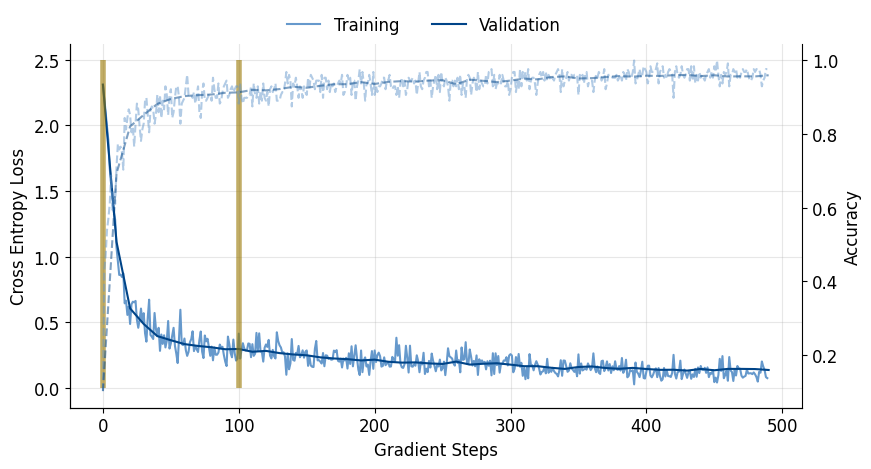

In [64]:
alpha = 0.5
ls = '--'
style_dict = {
    'train_step-loss_CrossEntropyLoss': {
        'label': 'Training'
    },
    'val-loss_CrossEntropyLoss': {
        'label': 'Validation'
    },
    'train_step-Accuracy': {
        'label': '',
        'alpha': alpha,
        'ls': ls
    },
    'val-Accuracy': {
        'label': '',
        'alpha': alpha,
        'ls': ls
    }
}
from ml_utilities.plot import tol_colors
cset = tol_colors.tol_cset('medium-contrast')
c = tol_colors.tol_cset('medium-contrast').dark_yellow
with plt.rc_context({'axes.prop_cycle': mpl.cycler('color', cset), 'font.size': 12}):
    f = plot_data_log_values(prdf,
                             x_axis='train_step',
                             y_axis_left=['train_step-loss_CrossEntropyLoss', 'val-loss_CrossEntropyLoss'],
                             y_axis_right=['train_step-Accuracy', 'val-Accuracy'],
                             y_label_left='Cross Entropy Loss',
                             y_label_right='Accuracy',
                             x_label='Gradient Steps',
                             style_dict=style_dict,
                             ylim=(-0.15,2.62),
                             figsize=(2 * 12 * 1 / 2.54, 1.5 * 8 * 1 / 2.54))
    f.axes[0].vlines(x=[0, 100], ymin=0, ymax=2.5, colors=[c, c], lw=4, alpha=0.6)


In [65]:
# f.savefig("pretraining_lenet_mnist_w_marker_gold.png", dpi=300, bbox_inches="tight")

## B. Sweep

### Load Sweep

In [11]:
sweepr = SweepResult(output_dir)
failed_jobs = sweepr.get_failed_jobs()
sweepr.sweep_params, len(failed_jobs), len(sweepr)

100%|██████████| 3200/3200 [00:12<00:00, 254.84it/s]


(['trainer.init_model_step',
  'data.dataset_kwargs.rotation_angle',
  'data.dataset_split.restrict_n_samples_train_task'],
 0,
 3200)

In [12]:
#* Code to insert missing best_step.txt files
# these jobs are marked as failed because the best_step.txt file is missing
# file missing because the val accuracy never increased and best_step = 0
# failed_jobs 
# n_files_missing = 0
# n_files_written = 0
# for j in failed_jobs:
#     try:
#         best_idx, spec = get_best_model_idx(j)
#     except:
#         final_results = Path(j) / 'data_logs' / 'final_results.yaml'
#         if final_results.exists():
#             fr_data = OmegaConf.load(final_results)
#             with open(Path(j) / 'best_step.txt', 'w') as fp:
#                 fp.write(str(fr_data.best_step))
#             n_files_written += 1
#         else:    
#             n_files_missing += 1
# n_files_missing, n_files_written

In [13]:
print(OmegaConf.to_yaml(sweepr.sweep_dict))

type: grid
axes:
- parameter: trainer.init_model_step
  vals:
  - 0
  - 10
  - 100
  - 480
- parameter: data.dataset_kwargs.rotation_angle
  vals: linspace(0,180,100,endpoint=True)
- parameter: data.dataset_split.restrict_n_samples_train_task
  vals:
  - 5
  - 20
  - 50
  - 100
  - 500
  - 1000
  - 10000
  - 48000



In [14]:
init_model_step_vals = [0, 10, 100, 480] #[0, 5, 10, 20, 50, 100, 480]
row_sel_train_steps = [0, 5, 10, 30, 100, 500]

In [15]:
# sdf = sweepr.get_summary(log_source='val', row_sel=('train_step', row_sel_train_steps), col_sel=['Accuracy'])
sdf = sweepr.get_summary()

100%|██████████| 3200/3200 [00:55<00:00, 57.44it/s] 


In [16]:
sdf.sort_values(by='data.dataset_split.restrict_n_samples_train_task')

,best_step,best_val_score,trainer.init_model_step,data.dataset_kwargs.rotation_angle,data.dataset_split.restrict_n_samples_train_task,seed
mnist-11.7.2-lenet_rottasks_samples--init_model_step-10-rotation_angle-127.27272727272727-restrict_n_samples_train_task-5-seed-0--221117_055603,5,0.261333,10,127.272727,5,0
mnist-11.7.2-lenet_rottasks_samples--init_model_step-10-rotation_angle-63.63636363636363-restrict_n_samples_train_task-5-seed-0--221117_011205,170,0.252583,10,63.636364,5,0
mnist-11.7.2-lenet_rottasks_samples--init_model_step-10-rotation_angle-129.0909090909091-restrict_n_samples_train_task-5-seed-0--221116_182350,5,0.263417,10,129.090909,5,0
mnist-11.7.2-lenet_rottasks_samples--init_model_step-100-rotation_angle-109.0909090909091-restrict_n_samples_train_task-5-seed-0--221116_205644,1985,0.225000,100,109.090909,5,0
mnist-11.7.2-lenet_rottasks_samples--init_model_step-480-rotation_angle-10.909090909090908-restrict_n_samples_train_task-5-seed-0--221117_052513,0,0.920750,480,10.909091,5,0
...,...,...,...,...,...,...
mnist-11.7.2-lenet_rottasks_samples--init_model_step-100-rotation_angle-7.2727272727272725-restrict_n_samples_train_task-48000-seed-0--221117_164400,1965,0.978750,100,7.272727,48000,0
mnist-11.7.2-lenet_rottasks_samples--init_model_step-10-rotation_angle-170.9090909090909-restrict_n_samples_train_task-48000-seed-0--221117_060421,1910,0.978917,10,170.909091,48000,0
mnist-11.7.2-lenet_rottasks_samples--init_model_step-0-rotation_angle-30.909090909090907-restrict_n_samples_train_task-48000-seed-0--221117_064759,1980,0.979750,0,30.909091,48000,0
mnist-11.7.2-lenet_rottasks_samples--init_model_step-480-rotation_angle-29.09090909090909-restrict_n_samples_train_task-48000-seed-0--221117_141719,1980,0.979667,480,29.090909,48000,0


In [17]:
sdf_init_step_0 = sdf[sdf['trainer.init_model_step'] == 0].sort_values(by=['data.dataset_split.restrict_n_samples_train_task','data.dataset_kwargs.rotation_angle'])
sdf_init_step_0

,best_step,best_val_score,trainer.init_model_step,data.dataset_kwargs.rotation_angle,data.dataset_split.restrict_n_samples_train_task,seed
mnist-11.7.2-lenet_rottasks_samples--init_model_step-0-rotation_angle-0.0-restrict_n_samples_train_task-5-seed-0--221117_133347,1980,0.237750,0,0.000000,5,0
mnist-11.7.2-lenet_rottasks_samples--init_model_step-0-rotation_angle-1.8181818181818181-restrict_n_samples_train_task-5-seed-0--221117_041049,2000,0.242583,0,1.818182,5,0
mnist-11.7.2-lenet_rottasks_samples--init_model_step-0-rotation_angle-3.6363636363636362-restrict_n_samples_train_task-5-seed-0--221116_222937,1640,0.243250,0,3.636364,5,0
mnist-11.7.2-lenet_rottasks_samples--init_model_step-0-rotation_angle-5.454545454545454-restrict_n_samples_train_task-5-seed-0--221117_065746,1980,0.246000,0,5.454545,5,0
mnist-11.7.2-lenet_rottasks_samples--init_model_step-0-rotation_angle-7.2727272727272725-restrict_n_samples_train_task-5-seed-0--221117_143500,1820,0.248583,0,7.272727,5,0
...,...,...,...,...,...,...
mnist-11.7.2-lenet_rottasks_samples--init_model_step-0-rotation_angle-172.72727272727272-restrict_n_samples_train_task-48000-seed-0--221117_051648,1910,0.979667,0,172.727273,48000,0
mnist-11.7.2-lenet_rottasks_samples--init_model_step-0-rotation_angle-174.54545454545453-restrict_n_samples_train_task-48000-seed-0--221117_011800,1910,0.978667,0,174.545455,48000,0
mnist-11.7.2-lenet_rottasks_samples--init_model_step-0-rotation_angle-176.36363636363635-restrict_n_samples_train_task-48000-seed-0--221116_230555,1905,0.978167,0,176.363636,48000,0
mnist-11.7.2-lenet_rottasks_samples--init_model_step-0-rotation_angle-178.1818181818182-restrict_n_samples_train_task-48000-seed-0--221117_042642,1985,0.978000,0,178.181818,48000,0


In [18]:
sdf_init_step_100 = sdf[sdf['trainer.init_model_step'] == 100].sort_values(by=['data.dataset_split.restrict_n_samples_train_task','data.dataset_kwargs.rotation_angle'])
sdf_init_step_100

,best_step,best_val_score,trainer.init_model_step,data.dataset_kwargs.rotation_angle,data.dataset_split.restrict_n_samples_train_task,seed
mnist-11.7.2-lenet_rottasks_samples--init_model_step-100-rotation_angle-0.0-restrict_n_samples_train_task-5-seed-0--221116_192130,0,0.913250,100,0.000000,5,0
mnist-11.7.2-lenet_rottasks_samples--init_model_step-100-rotation_angle-1.8181818181818181-restrict_n_samples_train_task-5-seed-0--221117_030343,0,0.911500,100,1.818182,5,0
mnist-11.7.2-lenet_rottasks_samples--init_model_step-100-rotation_angle-3.6363636363636362-restrict_n_samples_train_task-5-seed-0--221116_232531,0,0.908833,100,3.636364,5,0
mnist-11.7.2-lenet_rottasks_samples--init_model_step-100-rotation_angle-5.454545454545454-restrict_n_samples_train_task-5-seed-0--221117_072709,0,0.902750,100,5.454545,5,0
mnist-11.7.2-lenet_rottasks_samples--init_model_step-100-rotation_angle-7.2727272727272725-restrict_n_samples_train_task-5-seed-0--221117_000837,0,0.894167,100,7.272727,5,0
...,...,...,...,...,...,...
mnist-11.7.2-lenet_rottasks_samples--init_model_step-100-rotation_angle-172.72727272727272-restrict_n_samples_train_task-48000-seed-0--221117_162359,1905,0.979583,100,172.727273,48000,0
mnist-11.7.2-lenet_rottasks_samples--init_model_step-100-rotation_angle-174.54545454545453-restrict_n_samples_train_task-48000-seed-0--221116_201537,1905,0.979667,100,174.545455,48000,0
mnist-11.7.2-lenet_rottasks_samples--init_model_step-100-rotation_angle-176.36363636363635-restrict_n_samples_train_task-48000-seed-0--221116_220943,1825,0.979500,100,176.363636,48000,0
mnist-11.7.2-lenet_rottasks_samples--init_model_step-100-rotation_angle-178.1818181818182-restrict_n_samples_train_task-48000-seed-0--221117_130701,1545,0.980333,100,178.181818,48000,0


In [19]:
sdf_init_step_0['data.dataset_split.restrict_n_samples_train_task'].sort_values().unique()

array([    5,    20,    50,   100,   500,  1000, 10000, 48000])

### Adaptation for different model steps per number of samples in the training set

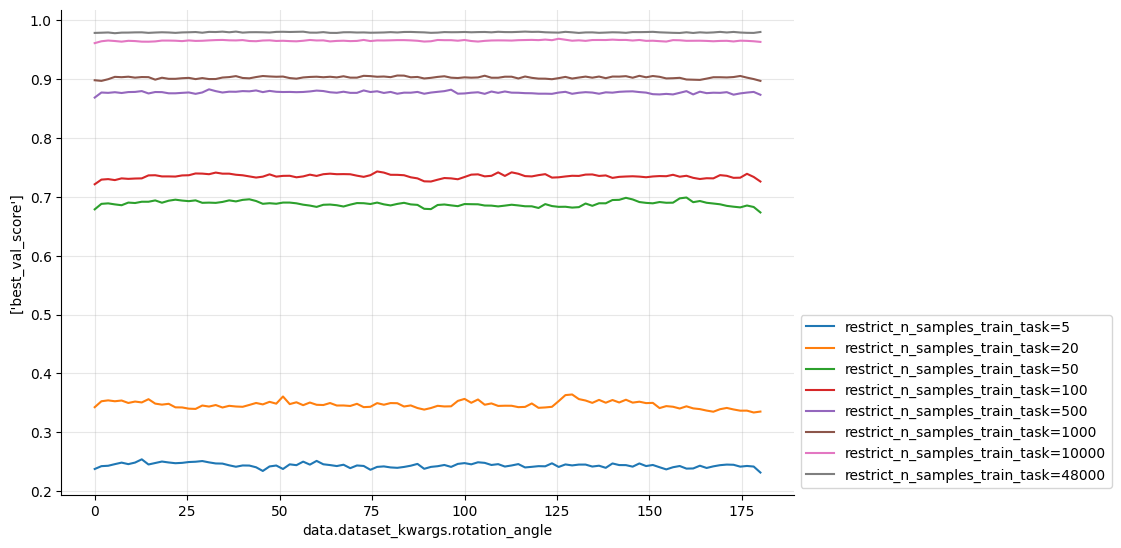

In [20]:
# Training from Random initialization
f = plot_sweep_summary(sdf_init_step_0, x_axis='data.dataset_kwargs.rotation_angle', y_axis='best_val_score', compare_parameter='data.dataset_split.restrict_n_samples_train_task', compare_parameter_val_selection=[])
# f = plot_sweep_summary(sdf_init_step_0, x_axis='data.dataset_kwargs.rotation_angle', y_axis='best_step', compare_parameter='data.dataset_split.restrict_n_samples_train_task', compare_parameter_val_selection=[])

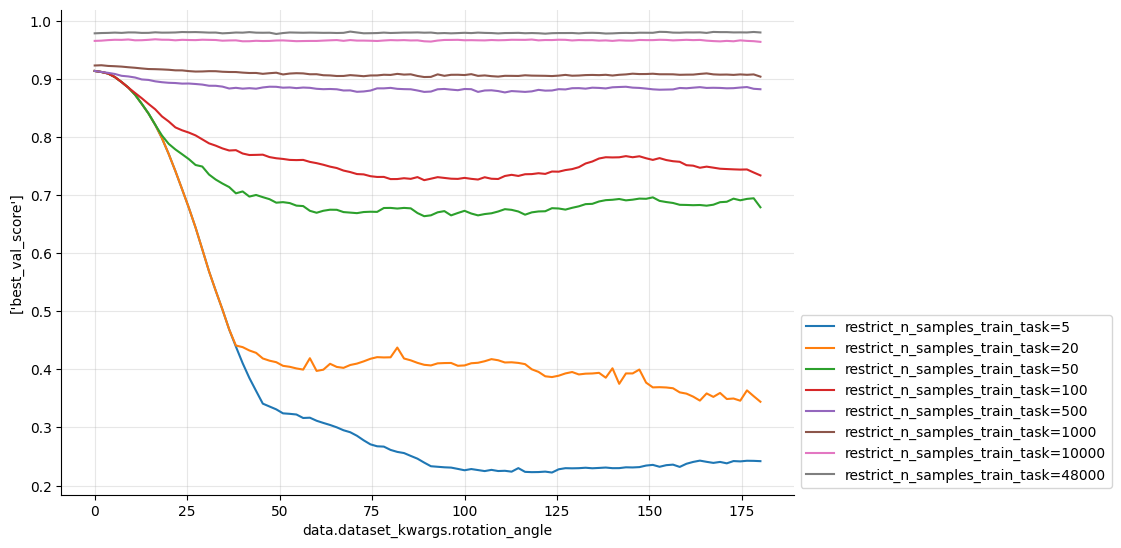

In [35]:
# Fine-tuning from pre-trained model with 100 steps
f = plot_sweep_summary(sdf_init_step_100, x_axis='data.dataset_kwargs.rotation_angle', y_axis='best_val_score', compare_parameter='data.dataset_split.restrict_n_samples_train_task', compare_parameter_val_selection=[])
# f = plot_sweep_summary(sdf_init_step_100, x_axis='data.dataset_kwargs.rotation_angle', y_axis='best_step', compare_parameter='data.dataset_split.restrict_n_samples_train_task', compare_parameter_val_selection=[])

In [22]:
# Evaluation of pretrained model over all rotations
sdf2 = sweepr.get_summary(log_source='val', row_sel=('train_step', 0), col_sel=['Accuracy'])

100%|██████████| 3200/3200 [00:29<00:00, 108.11it/s]


In [23]:
sdf_pretrained_eval = sdf2[(sdf2['trainer.init_model_step'] == 100) &
     (sdf2['data.dataset_split.restrict_n_samples_train_task'] == 48000)].sort_values(
         by='data.dataset_kwargs.rotation_angle')

In [44]:
sdf_randinit_eval = sdf2[(sdf2['trainer.init_model_step'] == 0) &
     (sdf2['data.dataset_split.restrict_n_samples_train_task'] == 48000)].sort_values(
         by='data.dataset_kwargs.rotation_angle')

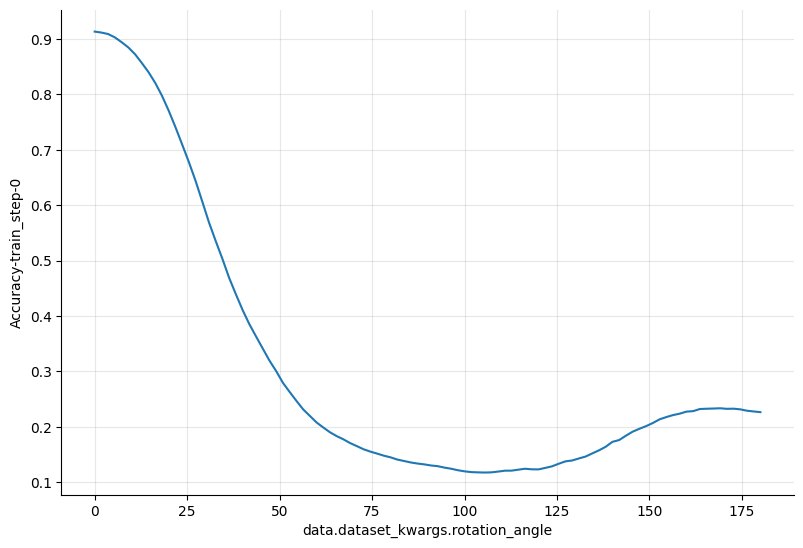

In [24]:
f = plot_data_log_values(sdf_pretrained_eval, y_axis_left='Accuracy-train_step-0', x_axis='data.dataset_kwargs.rotation_angle')

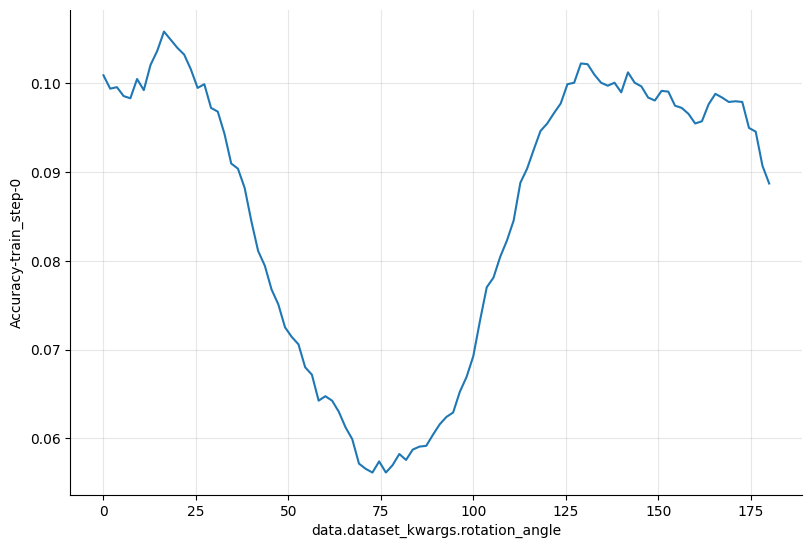

In [45]:
f = plot_data_log_values(sdf_randinit_eval, y_axis_left='Accuracy-train_step-0', x_axis='data.dataset_kwargs.rotation_angle')

### Plots for Presentation: rot_angle vs. Accuracy for different training length

In [52]:
init_model_step_vals = [0, 100]
n_train_samples = [5, 20, 100, 500, 1000, 48000]
sdf = sweepr.get_summary(log_source='val', row_sel=('train_step', 0), col_sel=['Accuracy'])
sdf_pretrainstep_plot_dict = {
    pretrainsteps: sdf[sdf['trainer.init_model_step'] == pretrainsteps].sort_values(
        by=['data.dataset_split.restrict_n_samples_train_task', 'data.dataset_kwargs.rotation_angle'])
    for pretrainsteps in init_model_step_vals
}
sdf_pretrained_eval = sdf[(sdf['trainer.init_model_step'] == 100) &
     (sdf['data.dataset_split.restrict_n_samples_train_task'] == 48000)].sort_values(
         by='data.dataset_kwargs.rotation_angle')
sdf_randinit_eval = sdf[(sdf['trainer.init_model_step'] == 0) &
     (sdf['data.dataset_split.restrict_n_samples_train_task'] == 48000)].sort_values(
         by='data.dataset_kwargs.rotation_angle')

100%|██████████| 3200/3200 [00:58<00:00, 54.72it/s] 


In [36]:
labels = [f'restrict_n_samples_train_task={ns}' for ns in n_train_samples]
labels

['restrict_n_samples_train_task=5',
 'restrict_n_samples_train_task=20',
 'restrict_n_samples_train_task=100',
 'restrict_n_samples_train_task=500',
 'restrict_n_samples_train_task=1000',
 'restrict_n_samples_train_task=48000']

In [69]:
y_axis = 'best_val_score'
pretrain_steps = [0,100]
labels = [f'restrict_n_samples_train_task={ns}' for ns in n_train_samples]
style_dict = {
    'restrict_n_samples_train_task=5': dict(label=5),
 'restrict_n_samples_train_task=20': dict(label=20),
 'restrict_n_samples_train_task=100': dict(label=100),
 'restrict_n_samples_train_task=500': dict(label=500),
 'restrict_n_samples_train_task=1000': dict(label='1k'),
 'restrict_n_samples_train_task=48000': dict(label='48k')
}
style_dict_eval = {
    'Accuracy-train_step-0': dict(label='No training', color=tol_colors.tol_cset('medium-contrast').dark_yellow)
}

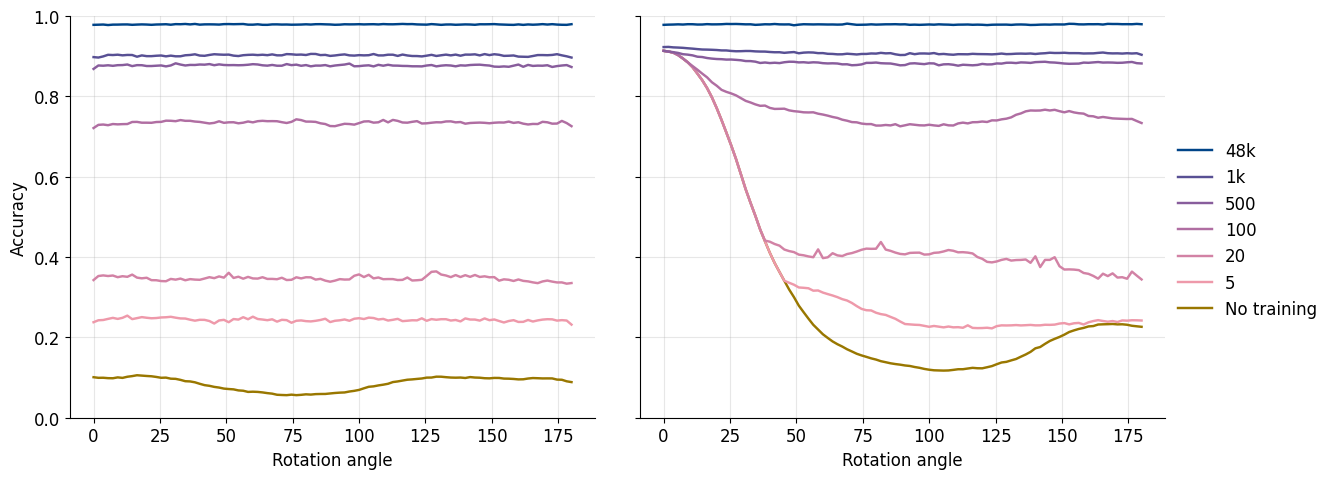

In [77]:
# create plot for rotated experiment
with mpl.rc_context({
        'axes.prop_cycle': mpl.cycler('color', color_palettes.grad_tol_medium_contrast_lightred_darkblue),
        'font.size': 12,
        'lines.linewidth': 1.75
}):
    fig, ax = plt.subplots(1, 2, figsize=(2.5 * 12 * 1 / 2.54, 1.5 * 8 * 1 / 2.54), sharey=True, sharex=True)
    fig.tight_layout()
    ax = ax.tolist()
    # left column
    f = plot_data_log_values(sdf_randinit_eval,
                             ax=ax[0],
                             y_axis_left='Accuracy-train_step-0',
                             x_axis='data.dataset_kwargs.rotation_angle',
                             y_label_left='Accuracy',
                             x_label='Rotation angle',
                             style_dict=style_dict_eval, 
                             ylim=(0, 1.0))
    f = plot_sweep_summary(sdf_pretrainstep_plot_dict[0],
                               ax=ax[0],
                               x_axis='data.dataset_kwargs.rotation_angle',
                               y_axis='best_val_score',
                               compare_parameter='data.dataset_split.restrict_n_samples_train_task',
                               compare_parameter_val_selection=n_train_samples,
                               y_label='Accuracy',
                               x_label='Rotation angle',
                               style_dict=style_dict,
                               legend_args={},
                               ylim=(0, 1.0))
    # right column
    f = plot_data_log_values(sdf_pretrained_eval,
                             ax=ax[1],
                             y_axis_left='Accuracy-train_step-0',
                             x_axis='data.dataset_kwargs.rotation_angle',
                             y_label_left=' ',
                             x_label='Rotation angle',
                             style_dict=style_dict_eval, 
                             ylim=(0, 1.0))
    f = plot_sweep_summary(sdf_pretrainstep_plot_dict[100],
                               ax=ax[1],
                               x_axis='data.dataset_kwargs.rotation_angle',
                               y_axis='best_val_score',
                               compare_parameter='data.dataset_split.restrict_n_samples_train_task',
                               compare_parameter_val_selection=n_train_samples,
                               y_label=' ',
                               style_dict=style_dict,
                               x_label='Rotation angle',
                               legend_args={},
                               ylim=(0, 1.0))
    handles, labels = ax[0].get_legend_handles_labels()
    ax[0].legend(handles[::-1],
                 labels[::-1],
                 frameon=False,
                 title=' ',
                 loc='center left',
                 bbox_to_anchor=(2.08, 0.5),
                 ncol=1)


In [76]:
# fig.savefig("trainfromscratch_vs_finetuning_lenet_rotatedmnist_samples_no_training.png", dpi=300, bbox_inches="tight")

## C. Dataset

In [34]:
def show_rotated_dataset(rotation_angle, n_images=9, n_cols=3):
    data_cfg = f"""
data:
  dataset: rotatedvision
  dataset_kwargs:
    data_root_path: /system/user/beck/pwbeck/data
    dataset: mnist
    rotation_angle: {rotation_angle}
  dataset_split:
    train_val_split: 0.8
"""
    data_cfg = OmegaConf.create(data_cfg)
    data_cfg = data_cfg.data
    dataset_generator = DatasetGenerator(dataset=data_cfg.dataset,
                                     dataset_kwargs=data_cfg.dataset_kwargs,
                                     dataset_split=data_cfg.dataset_split)
    dataset_generator.generate_dataset()
    train_set, val_set = dataset_generator.train_split, dataset_generator.val_split
    show_images(train_set, n_images, n_cols, cmap='gray', shuffle=False, select_idxes=[21, 23, 1, 3, 2, 7, 4, 8, 0], fname=f'mnist_{rotation_angle}.png')
    

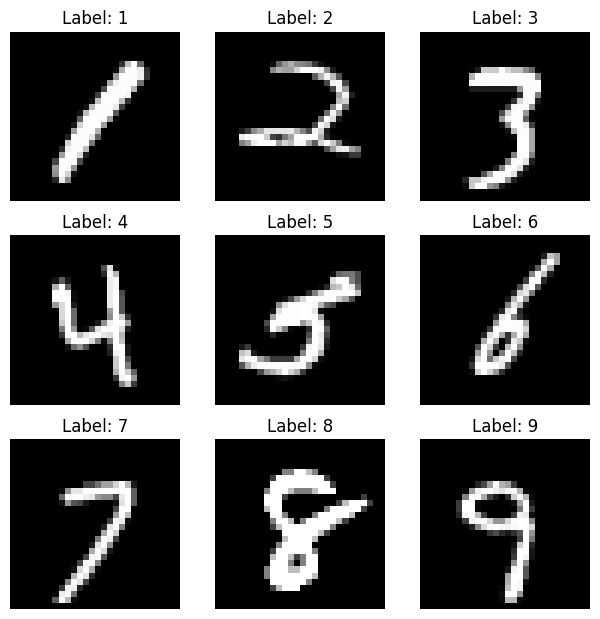

In [35]:
show_rotated_dataset(0)

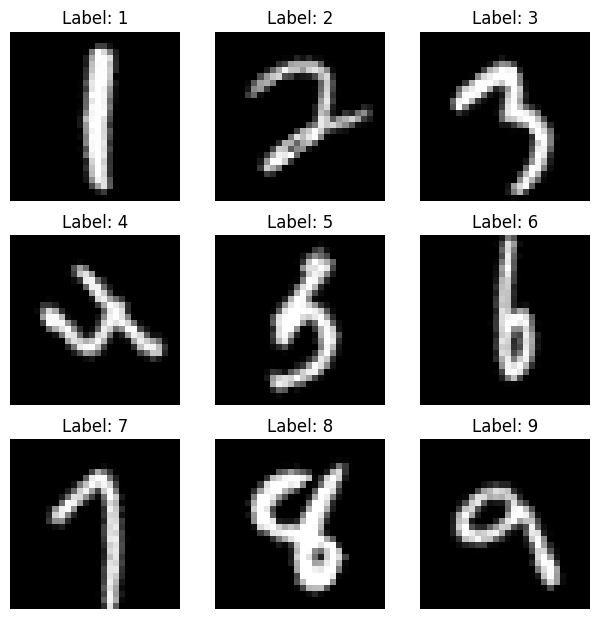

In [36]:
show_rotated_dataset(35.0)

In [14]:
rotation_angle = 0.0
data_cfg = f"""
data:
  dataset: rotatedvision
  dataset_kwargs:
    data_root_path: /system/user/beck/pwbeck/data
    dataset: mnist
    rotation_angle: {rotation_angle}
  dataset_split:
    train_val_split: 0.8
"""
data_cfg = OmegaConf.create(data_cfg)
data_cfg = data_cfg.data
dataset_generator = DatasetGenerator(dataset=data_cfg.dataset,
                                     dataset_kwargs=data_cfg.dataset_kwargs,
                                     dataset_split=data_cfg.dataset_split)
dataset_generator.generate_dataset()
train_set, val_set = dataset_generator.train_split, dataset_generator.val_split

In [26]:
# Find indexes such that every digit is in list
labels_to_find = np.arange(1,10).tolist()
labels_remaining = len(labels_to_find)

label_idx_dict = {label: None for label in labels_to_find}

idx = 0
while labels_remaining > 0:
    label = train_set[idx][1]
    if label in label_idx_dict and label_idx_dict[label] is None:
        label_idx_dict[label] = idx
        labels_remaining -= 1
    idx += 1
print(label_idx_dict)
print(list(label_idx_dict.values()))

{1: 21, 2: 23, 3: 1, 4: 3, 5: 2, 6: 7, 7: 4, 8: 8, 9: 0}
[21, 23, 1, 3, 2, 7, 4, 8, 0]
